## EDA Theme or Direction

We are going to look at the following within each presidential state of union address:

1. **Common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words
3. **Wordcount involving Other Superpowers** - frequency of words that involve China, Russia or Europe
4. **Wordcount involving Domestic Issues** - frequency of words that involve race, income inequality, climate change

The main goal is to use these metrics to identify what the focus of the president is without the need to spend time to read the entire text.

## Common words/Wordcloud

In [13]:
# Import pandas to read document-term matrix
import pandas as pd
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data

,Barack Obama2010,Barack Obama2011,Barack Obama2012,Barack Obama2013,Barack Obama2014,Barack Obama2015,Barack Obama2016,Bill Clinton1994,Bill Clinton1995,Bill Clinton1996,...,George H.W. Bush1990,George H.W. Bush1991,George H.W. Bush1992,George W. Bush2002,George W. Bush2003,George W. Bush2004,George W. Bush2005,George W. Bush2006,George W. Bush2007,George W. Bush2008
aaron,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abandon,0,1,0,0,0,1,0,1,0,3,...,0,1,0,0,0,0,2,2,2,1
abba,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
abid,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
abil,1,0,0,3,0,0,0,1,2,1,...,0,0,0,0,1,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zeroemiss,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
zimbabw,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
zion,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
zone,0,0,0,0,0,0,0,1,0,1,...,0,2,1,0,0,0,0,0,0,0


In [15]:
# create a dictionary that contains top 30 words based on the matrix
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'Barack Obama2010': [('year', 46),
  ('american', 46),
  ('peopl', 33),
  ('work', 32),
  ('job', 29),
  ('nation', 28),
  ('whi', 27),
  ('busi', 26),
  ('america', 24),
  ('make', 23),
  ('ha', 23),
  ('right', 23),
  ('help', 22),
  ('wa', 22),
  ('let', 22),
  ('know', 22),
  ('tax', 21),
  ('new', 20),
  ('time', 20),
  ('famili', 20),
  ('becaus', 20),
  ('invest', 18),
  ('need', 15),
  ('countri', 15),
  ('govern', 15),
  ('economi', 15),
  ('just', 15),
  ('energi', 15),
  ('deficit', 14),
  ('valu', 14)],
 'Barack Obama2011': [('applaus', 80),
  ('year', 40),
  ('new', 36),
  ('peopl', 33),
  ('american', 31),
  ('job', 31),
  ('make', 29),
  ('america', 27),
  ('ha', 26),
  ('work', 25),
  ('just', 21),
  ('busi', 21),
  ('govern', 20),
  ('come', 20),
  ('need', 20),
  ('nation', 20),
  ('world', 18),
  ('know', 17),
  ('want', 17),
  ('becaus', 17),
  ('tonight', 17),
  ('school', 16),
  ('countri', 16),
  ('futur', 15),
  ('compani', 15),
  ('child', 15),
  ('educ', 14),

In [16]:
# organize everything and print out the top 15 words for each presidential state of the union address
for president, top_words in top_dict.items():
    print(president)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

Barack Obama2010
year, american, peopl, work, job, nation, whi, busi, america, make, ha, right, help, wa
---
Barack Obama2011
applaus, year, new, peopl, american, job, make, america, ha, work, just, busi, govern, come
---
Barack Obama2012
applaus, american, job, year, america, tax, right, work, new, make, becaus, busi, ha, energi
---
Barack Obama2013
applaus, job, year, work, american, make, america, new, let, right, peopl, need, countri, tonight
---
Barack Obama2014
american, work, help, year, job, america, new, ha, make, everi, peopl, let, busi, need
---
Barack Obama2015
applaus, new, year, america, american, make, work, job, need, time, everi, famili, let, peopl
---
Barack Obama2016
applaus, american, year, america, work, peopl, world, chang, just, make, want, need, job, new
---
Bill Clinton1994
peopl, work, year, care, american, health, job, know, congress, ha, everi, countri, world, welfar
---
Bill Clinton1995
peopl, work, year, new, american, govern, countri, cut, way, let, time,

In [18]:
# we can see that there are still a lot of stop words, we will eliminate them by adding them to the stopword list
# extract the top 30 words for each state of union speech
from collections import Counter
words = []
for president in data.columns:
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        words.append(t)
words[:30]

['year',
 'american',
 'peopl',
 'work',
 'job',
 'nation',
 'whi',
 'busi',
 'america',
 'make',
 'ha',
 'right',
 'help',
 'wa',
 'let',
 'know',
 'tax',
 'new',
 'time',
 'famili',
 'becaus',
 'invest',
 'need',
 'countri',
 'govern',
 'economi',
 'just',
 'energi',
 'deficit',
 'valu']

In [19]:
# Then identiry most common words that everybody uses
Counter(words).most_common()

[('american', 26),
 ('peopl', 26),
 ('new', 26),
 ('america', 25),
 ('year', 24),
 ('ha', 24),
 ('work', 23),
 ('help', 22),
 ('nation', 21),
 ('make', 21),
 ('world', 21),
 ('countri', 20),
 ('time', 18),
 ('everi', 17),
 ('job', 16),
 ('congress', 16),
 ('need', 15),
 ('know', 14),
 ('tonight', 14),
 ('child', 14),
 ('let', 12),
 ('wa', 11),
 ('famili', 11),
 ('state', 11),
 ('govern', 10),
 ('secur', 10),
 ('becaus', 9),
 ('communiti', 8),
 ('right', 7),
 ('tax', 7),
 ('just', 7),
 ('want', 7),
 ('school', 7),
 ('ask', 7),
 ('busi', 6),
 ('economi', 6),
 ('way', 6),
 ('terrorist', 6),
 ('applaus', 5),
 ('futur', 5),
 ('like', 5),
 ('support', 5),
 ('centuri', 5),
 ('life', 5),
 ('freedom', 5),
 ('iraq', 5),
 ('come', 4),
 ('weve', 4),
 ('million', 4),
 ('care', 4),
 ('health', 4),
 ('say', 4),
 ('togeth', 4),
 ('good', 4),
 ('unit', 4),
 ('war', 4),
 ('energi', 3),
 ('educ', 3),
 ('reform', 3),
 ('home', 3),
 ('today', 3),
 ('thing', 3),
 ('chang', 3),
 ('citizen', 3),
 ('program', 

In [49]:
# The criteria is if more than half of the presidential speeches have them, then they should be added to the stop word list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
stop_list = ['applaus','whi','come','like','thank']

for i in stop_list:
    add_stop_words.append(i)

add_stop_words

['american',
 'peopl',
 'new',
 'america',
 'year',
 'ha',
 'work',
 'help',
 'nation',
 'make',
 'world',
 'countri',
 'time',
 'everi',
 'job',
 'congress',
 'need',
 'know',
 'tonight',
 'child',
 'let',
 'wa',
 'famili',
 'state',
 'govern',
 'secur',
 'becaus',
 'communiti',
 'right',
 'tax',
 'just',
 'want',
 'school',
 'ask',
 'applaus',
 'whi',
 'come',
 'like',
 'thank']

In [50]:
# then update the document-term matrix with the generated list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# load the clean data
data_clean = pd.read_pickle('data_clean.pkl')

# add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# re-create the document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# store as pickle for later usage
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [51]:
# create a wordcloud, must install through 'conda install -c conda-forge wordcloud'
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

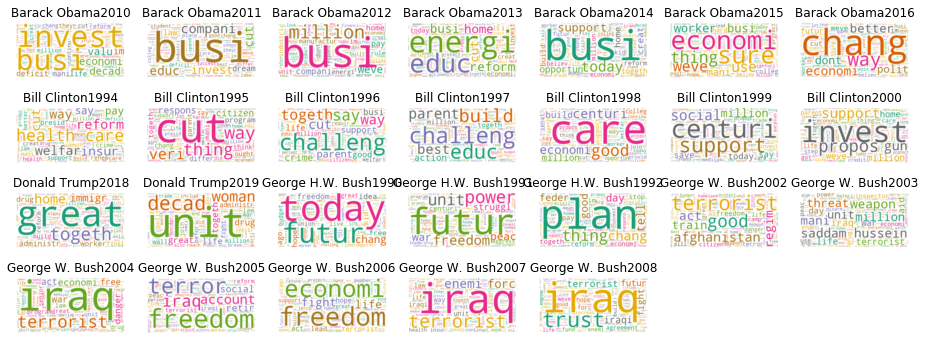

In [52]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = data.columns.tolist()

# Create subplots for each state of union address
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(4, 7, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

Based on the wordcloud, each president had a different but consistent on what they addressed during the years.

1. **George H.W. Bush** - consistent focus on future and change;
2. **Bill Clinton** - the most diverse candidate in what he addresses, each year is different, his themes focused on healthcare, taxcuts, parenting, investing;
3. **George W. Bush** - constant focus on terrorism, iraq and freedom;
4. **Barack Obama** - surprisingly obsessed with business and the economy;
5. **Donald Trump** - focused on nationalism and women's rights.

Of course, the word cloud only gives us some idea as to what is going on, we will continue to dig deeper.

## Size of vocabulary

In [61]:
# Identify the non-zero items in the document-term matrix
unique_list = []
for president in data.columns:
    uniques = data[president].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count along with president info
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['president', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort.tail()

,president,unique_words
12,Bill Clinton1999,1234
8,Bill Clinton1995,1249
4,Barack Obama2014,1265
13,Bill Clinton2000,1348
11,Bill Clinton1998,1355


In [67]:
# clean up the data frame to only include presidents and aggregate everything
president_list = []
for i in data_unique_sort.president:
    president_list.append(i[:-4])
data_unique_sort['president_name'] = president_list
data_unique_sort.drop('president',axis = 1, inplace = True)

In [140]:
# aggregate the unique word values
df = data_unique_sort.groupby('president_name').count()
df2 = data_unique_sort.groupby('president_name').sum()
df['president_name'] = df.index
df.reset_index(drop=True, inplace=True)
df2['president_name'] = df2.index
df2.reset_index(drop=True, inplace=True)
df = df.join(df2, lsuffix='_words', rsuffix='_count').drop('president_name_count', axis=1)

In [141]:
df['avg_count'] = df['unique_words_count']/df['unique_words_words']
df = df.drop(['unique_words_words', 'unique_words_count'], axis=1)
df.columns = ['president', 'avg_word_count']

In [144]:
df.head()

,president,avg_word_count
0,Barack Obama,1216.142857
1,Bill Clinton,1229.000000
2,Donald Trump,1195.500000
3,George H.W. Bush,885.666667
4,George W. Bush,1056.285714


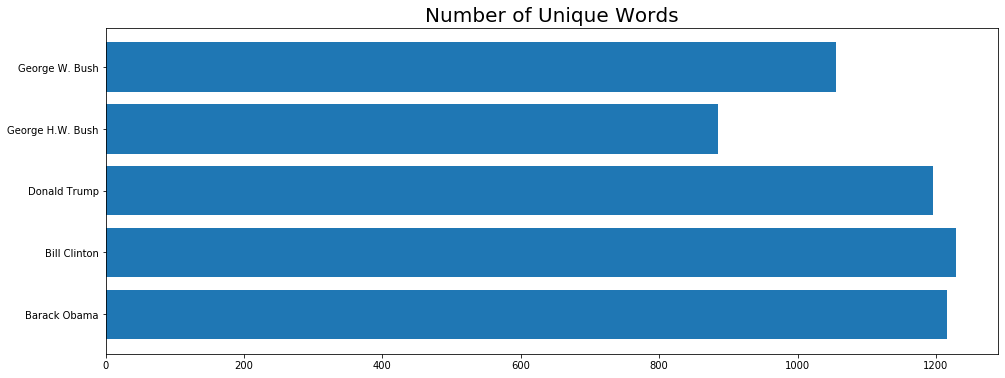

In [143]:
# Let's plot our findings
import numpy as np
y_pos = np.arange(len(df))
plt.barh(y_pos, df.avg_word_count, align='center')
plt.yticks(y_pos, df.president)
plt.title('Number of Unique Words', fontsize=20)
plt.show()

In [145]:
Counter(words).most_common()

[('american', 26),
 ('peopl', 26),
 ('new', 26),
 ('america', 25),
 ('year', 24),
 ('ha', 24),
 ('work', 23),
 ('help', 22),
 ('nation', 21),
 ('make', 21),
 ('world', 21),
 ('countri', 20),
 ('time', 18),
 ('everi', 17),
 ('job', 16),
 ('congress', 16),
 ('need', 15),
 ('know', 14),
 ('tonight', 14),
 ('child', 14),
 ('let', 12),
 ('wa', 11),
 ('famili', 11),
 ('state', 11),
 ('govern', 10),
 ('secur', 10),
 ('becaus', 9),
 ('communiti', 8),
 ('right', 7),
 ('tax', 7),
 ('just', 7),
 ('want', 7),
 ('school', 7),
 ('ask', 7),
 ('busi', 6),
 ('economi', 6),
 ('way', 6),
 ('terrorist', 6),
 ('applaus', 5),
 ('futur', 5),
 ('like', 5),
 ('support', 5),
 ('centuri', 5),
 ('life', 5),
 ('freedom', 5),
 ('iraq', 5),
 ('come', 4),
 ('weve', 4),
 ('million', 4),
 ('care', 4),
 ('health', 4),
 ('say', 4),
 ('togeth', 4),
 ('good', 4),
 ('unit', 4),
 ('war', 4),
 ('energi', 3),
 ('educ', 3),
 ('reform', 3),
 ('home', 3),
 ('today', 3),
 ('thing', 3),
 ('chang', 3),
 ('citizen', 3),
 ('program', 